#svr

##import data and lib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [3]:
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [4]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

##Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
y= sc.fit_transform(y)

In [6]:
X,y

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

##training SVR model


In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') #radial basis funtion kernal
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Prediction

In [8]:
sc.inverse_transform(regressor.predict(sc.transform([[6.5]])).reshape(-1,1))


array([[87714.85539438]])

##visualising

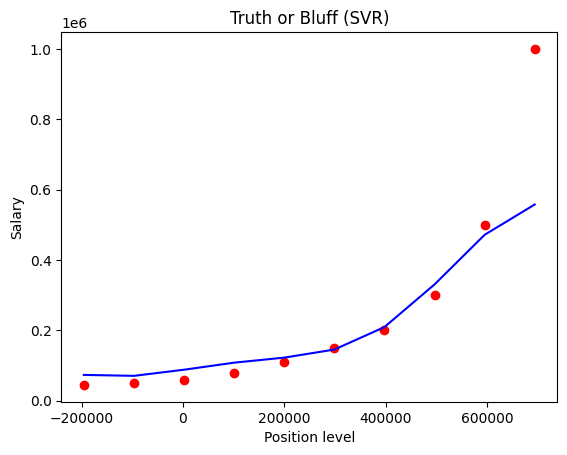

In [12]:
plt.scatter(sc.inverse_transform(X), sc.inverse_transform(y), color = 'red')
plt.plot(sc.inverse_transform(X), sc.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()